In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_06_02 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
rf_size=19
eta=1e-6
number_of_neurons=25
number_of_processes=4
mu_c=0
sigma_c=0
blur=4
open_eye_noise=0.1

Nsim=11
mu_c_mat=array( list(linspace(0,20,Nsim))+ [3]*Nsim )
sigma_c_mat=array([1]*Nsim + list(linspace(0,6,Nsim)))

contrast_mat=linspace(0,1,6)  # linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,50,90])


contrast_mat,mu_c_mat,sigma_c_mat,f_mat

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]),
 array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0.6,
        1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 array([10, 50, 90]))

In [4]:
loadvars('results/2023-06-11 - Contrast Sims - Results.asdf')
all_params=[Struct(_) for _ in all_params]

Found ['all_params', 'ODI_results']


In [5]:
top=.9
v=np.flip(linspace(0,top,Nsim))

plasma=truncate_colormap(cm.plasma,0, top)
viridis=truncate_colormap(cm.viridis,0, top)


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

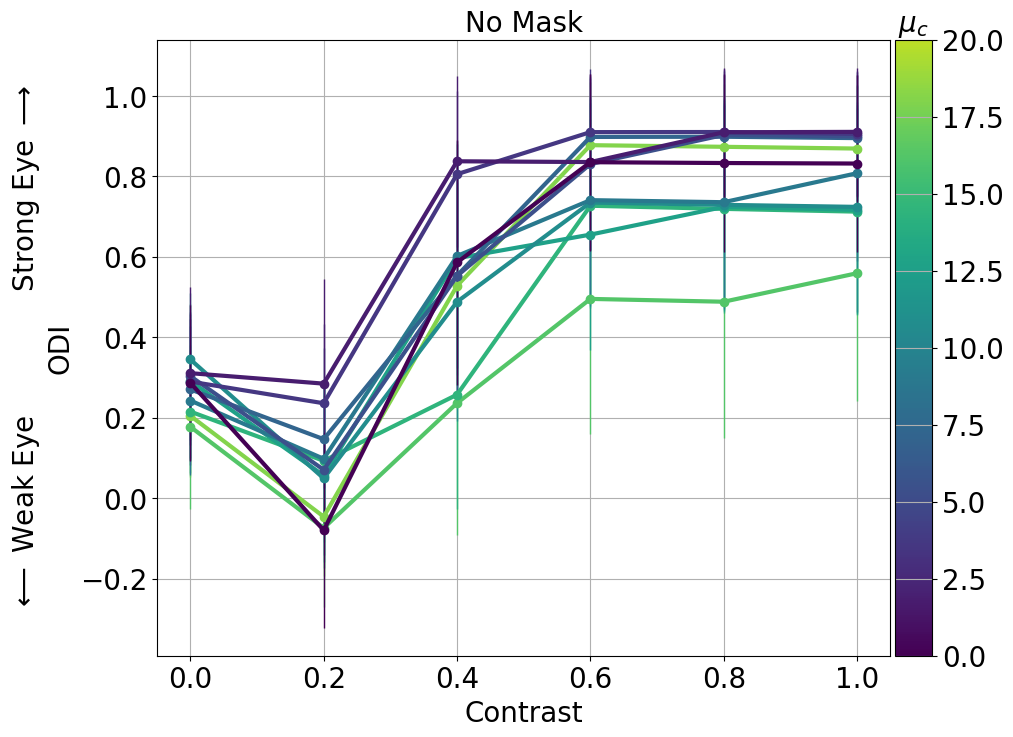

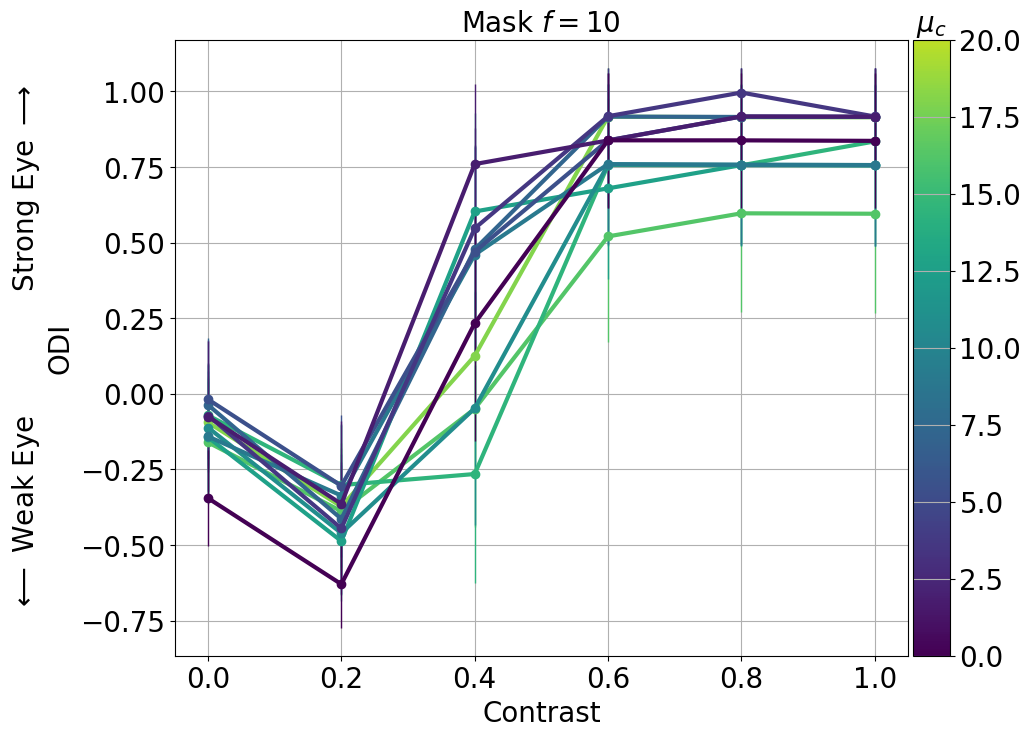

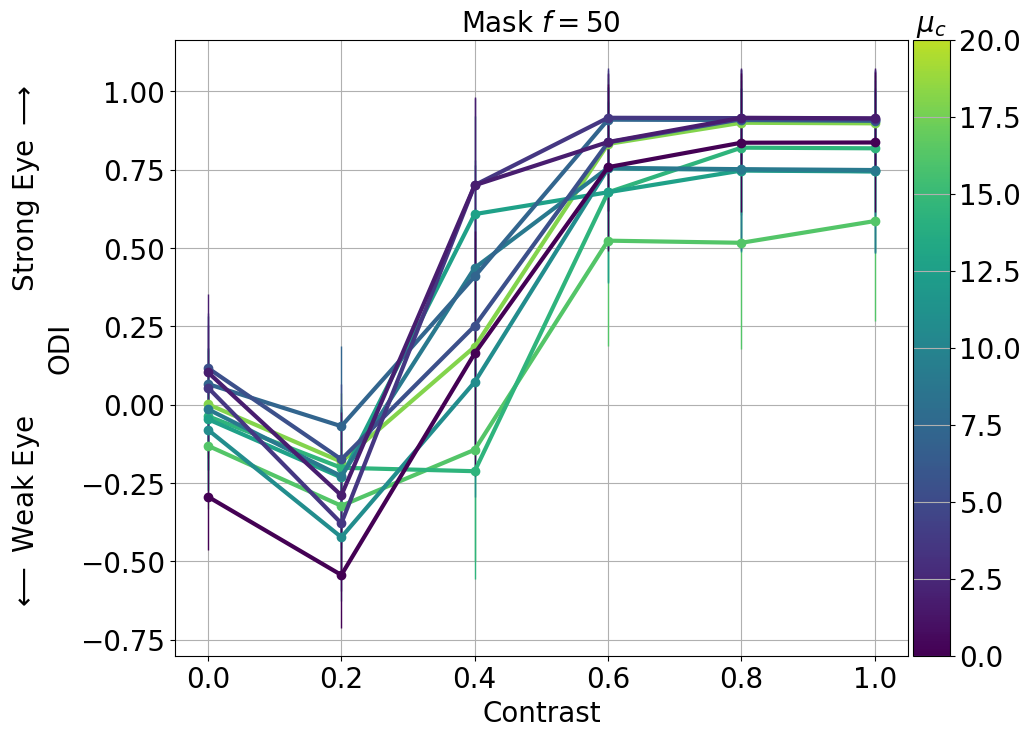

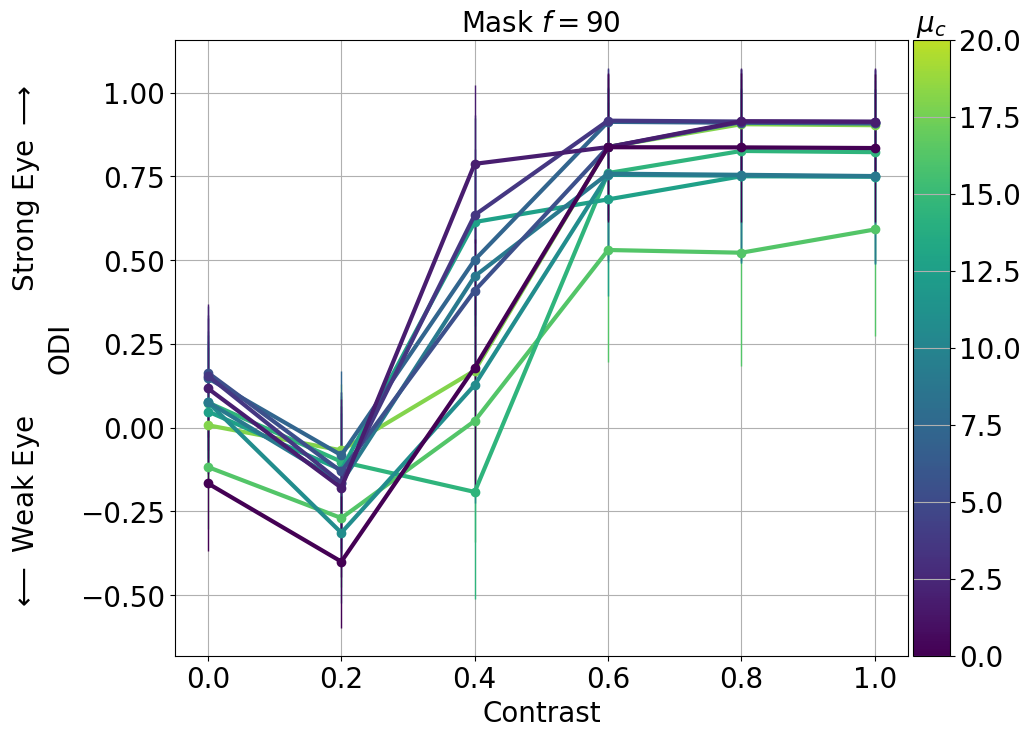

In [6]:
figure()
for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n] and 
        _.sigma_c==sigma_c_mat[n] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        ODI=ODI_results[params.sfname]
        contrast=params.contrast
        μ,σ=μσ(ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()

                
    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=viridis(v[n]))


xlabel('Contrast')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
title('No Mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=viridis,
                                norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\mu_c$')


for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    
    figure()

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n] and 
            _.sigma_c==sigma_c_mat[n] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            ODI=ODI_results[params.sfname]
            contrast=params.contrast
            μ,σ=μσ(ODI[-1])

            s+=contrast,μ,σ

        contrast,μ,σ=s.arrays()


        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=viridis(v[n]))


    xlabel('Contrast')
    ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
    title(f'Mask $f={f}$')

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=viridis,
                                    norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    title(r'$\mu_c$')



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

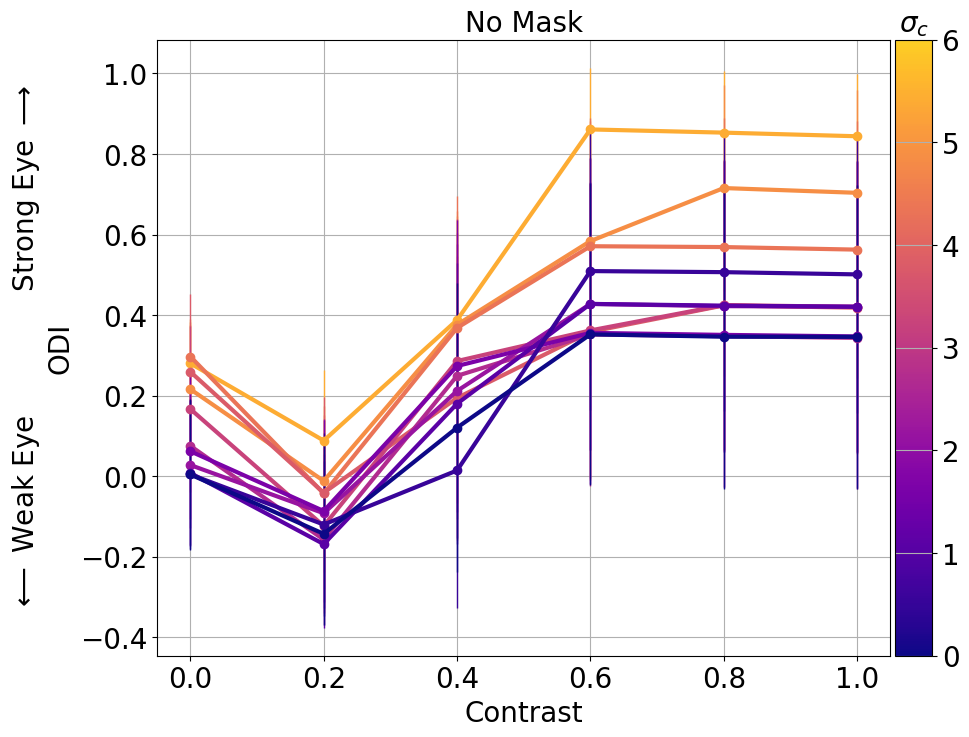

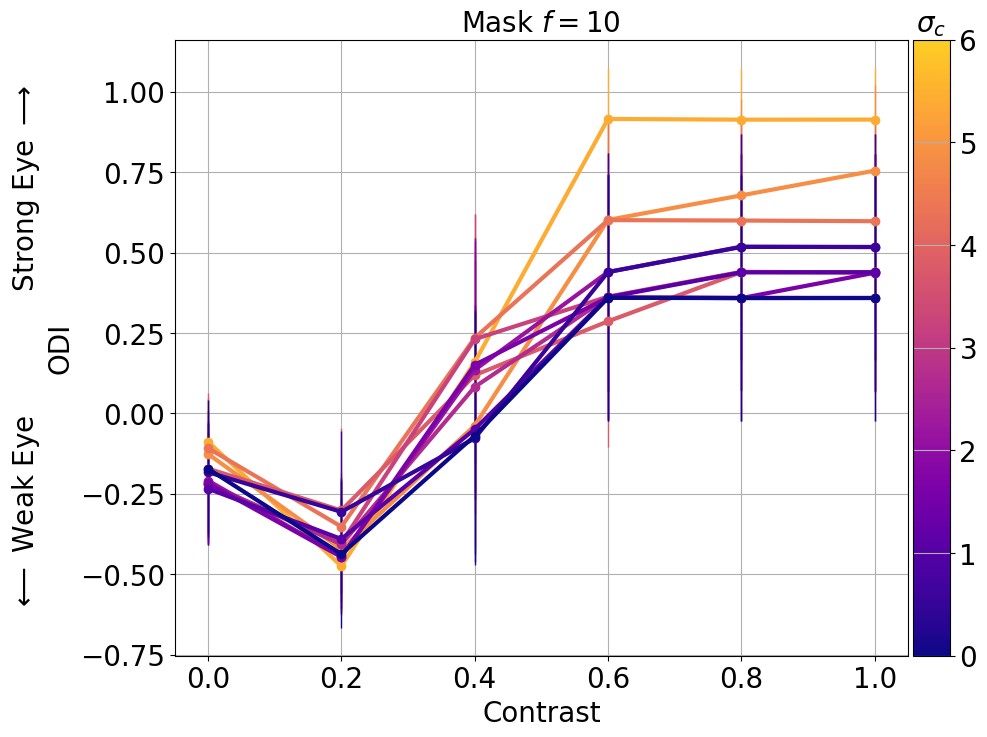

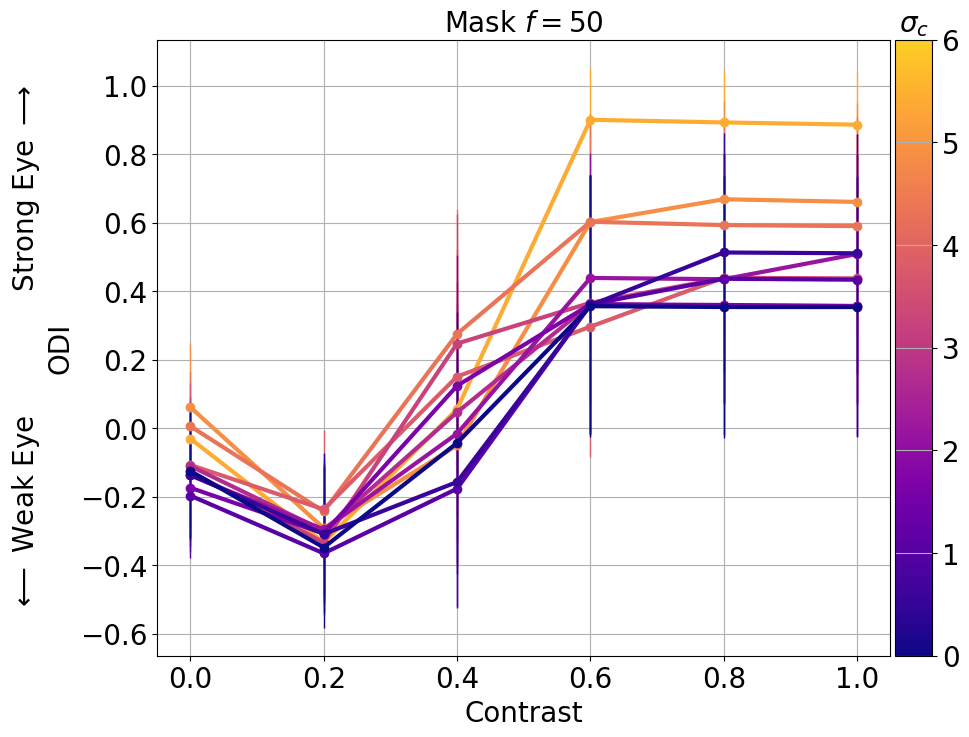

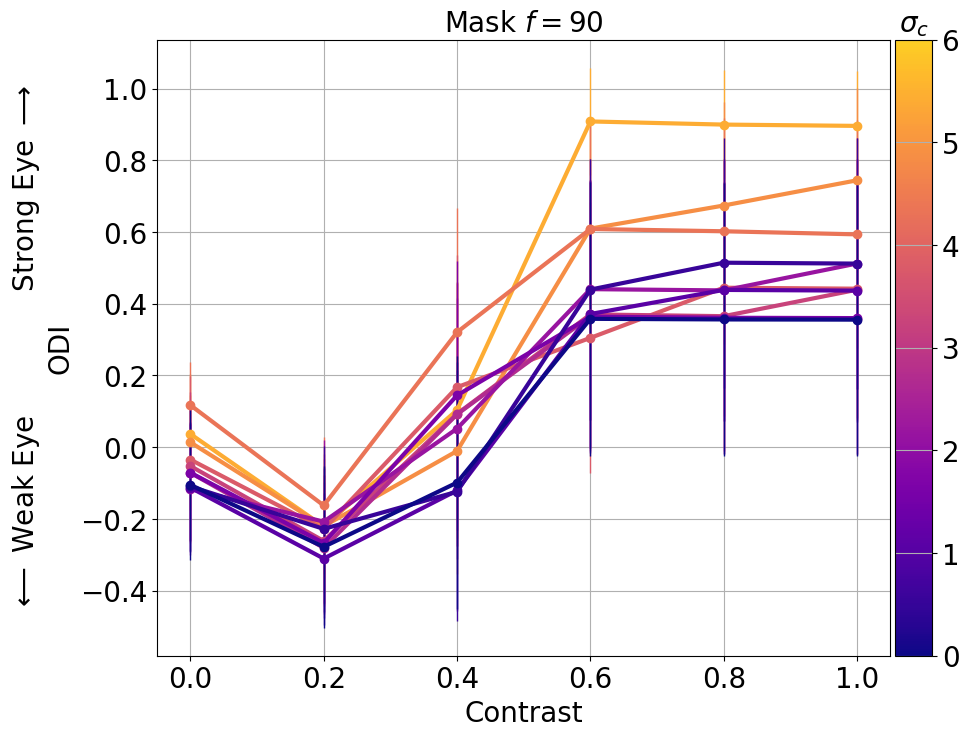

In [7]:
figure()
for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n+Nsim] and 
        _.sigma_c==sigma_c_mat[n+Nsim] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        ODI=ODI_results[params.sfname]
        contrast=params.contrast
        μ,σ=μσ(ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()

    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=plasma(v[n]))


xlabel('Contrast')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
title('No Mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plasma,
                                norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\sigma_c$')

for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    
    figure()

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n+Nsim] and 
            _.sigma_c==sigma_c_mat[n+Nsim] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            ODI=ODI_results[params.sfname]
            contrast=params.contrast
            μ,σ=μσ(ODI[-1])

            s+=contrast,μ,σ

        contrast,μ,σ=s.arrays()

        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=plasma(v[n]))


    xlabel('Contrast')
    ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
    title(f'Mask $f={f}$')

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plasma,norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    title(r'$\sigma_c$')



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

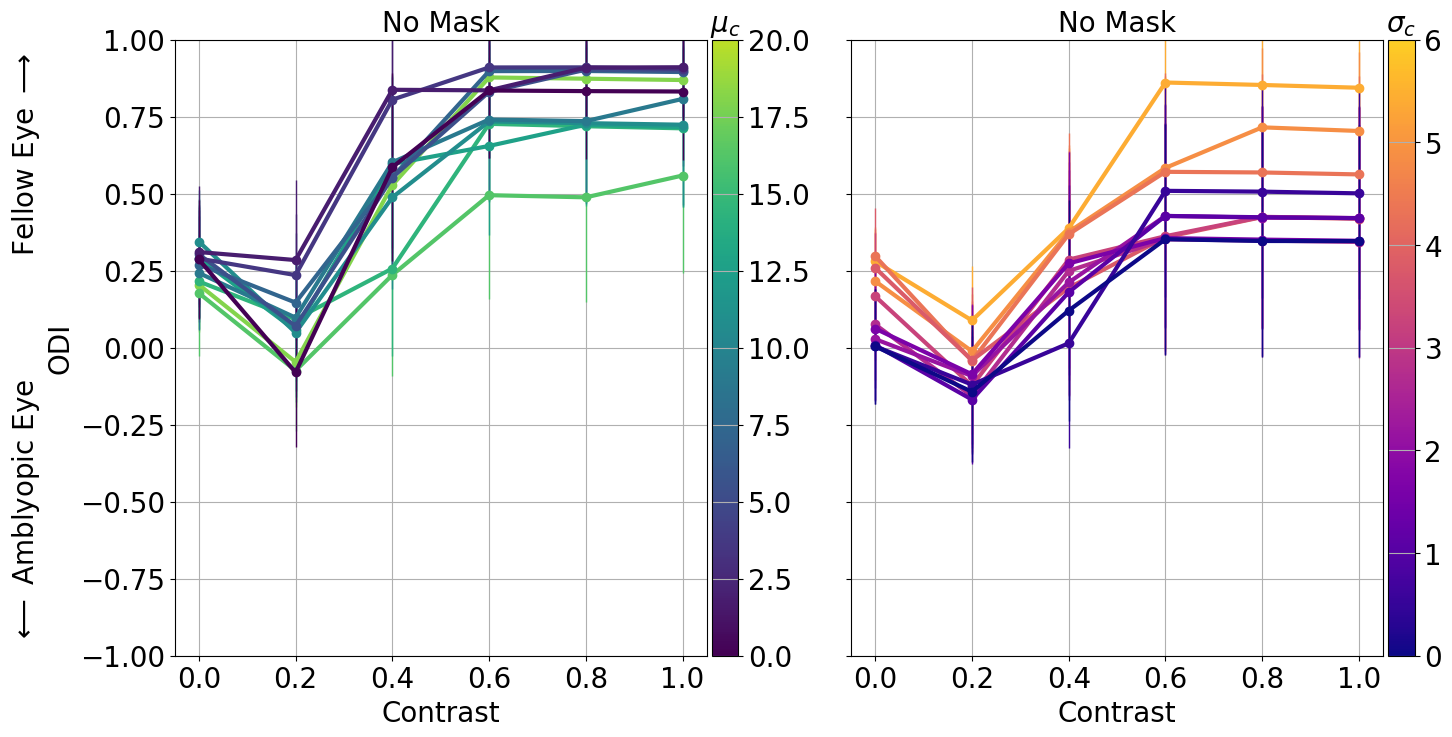

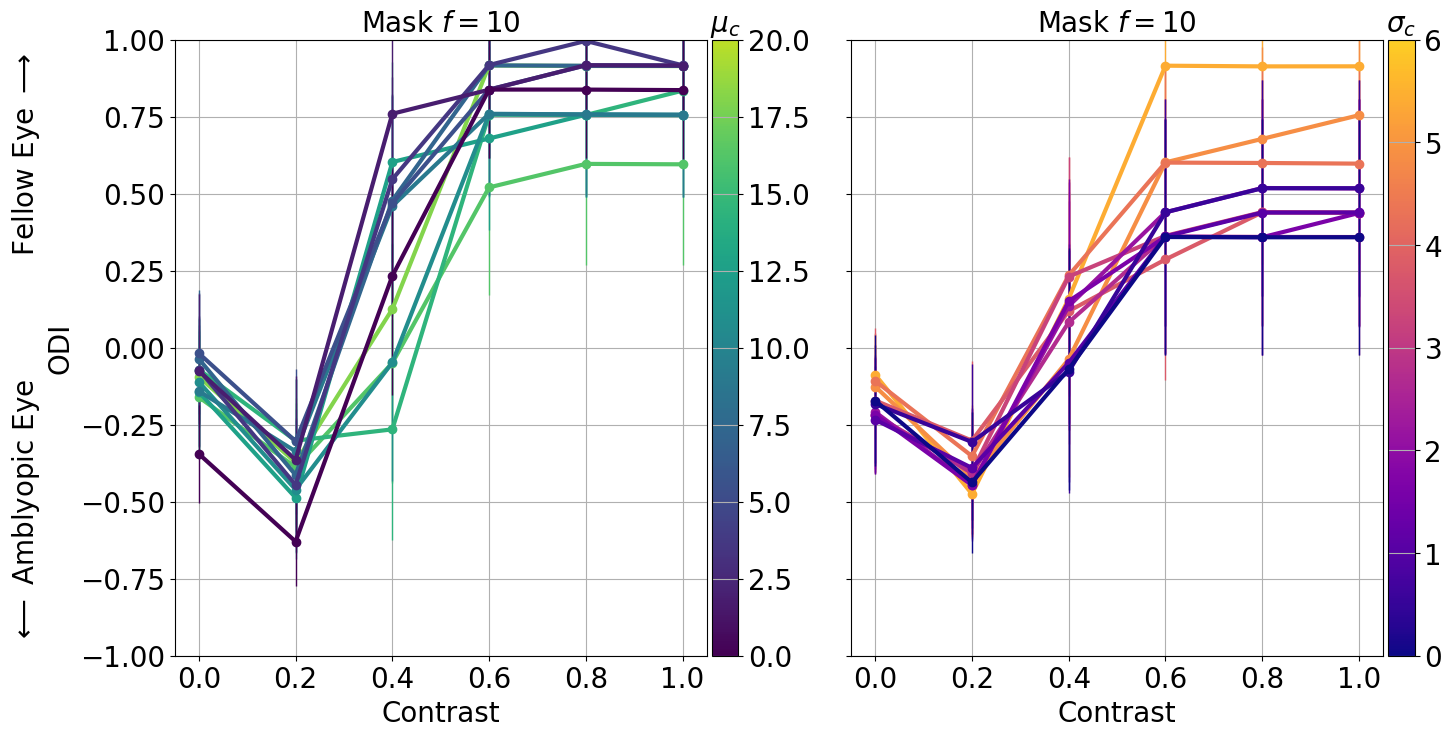

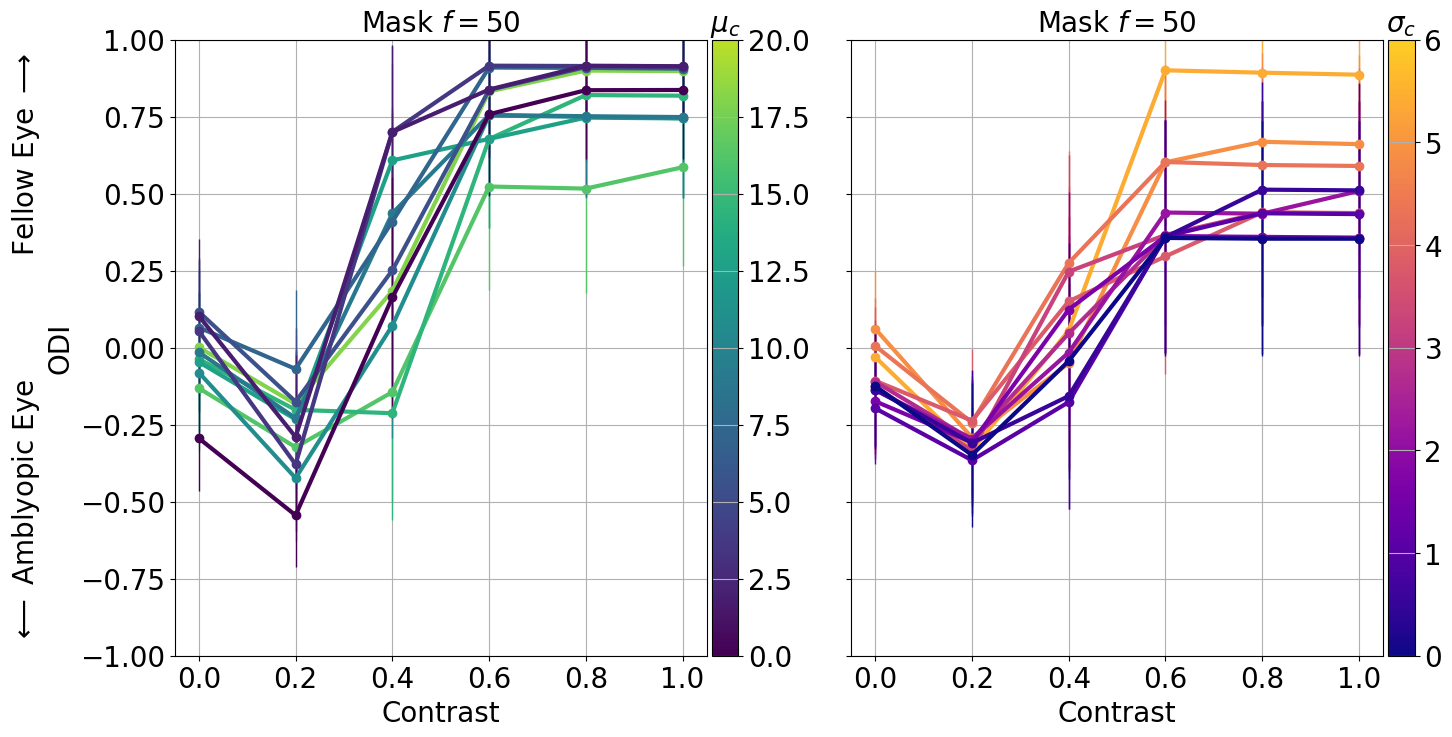

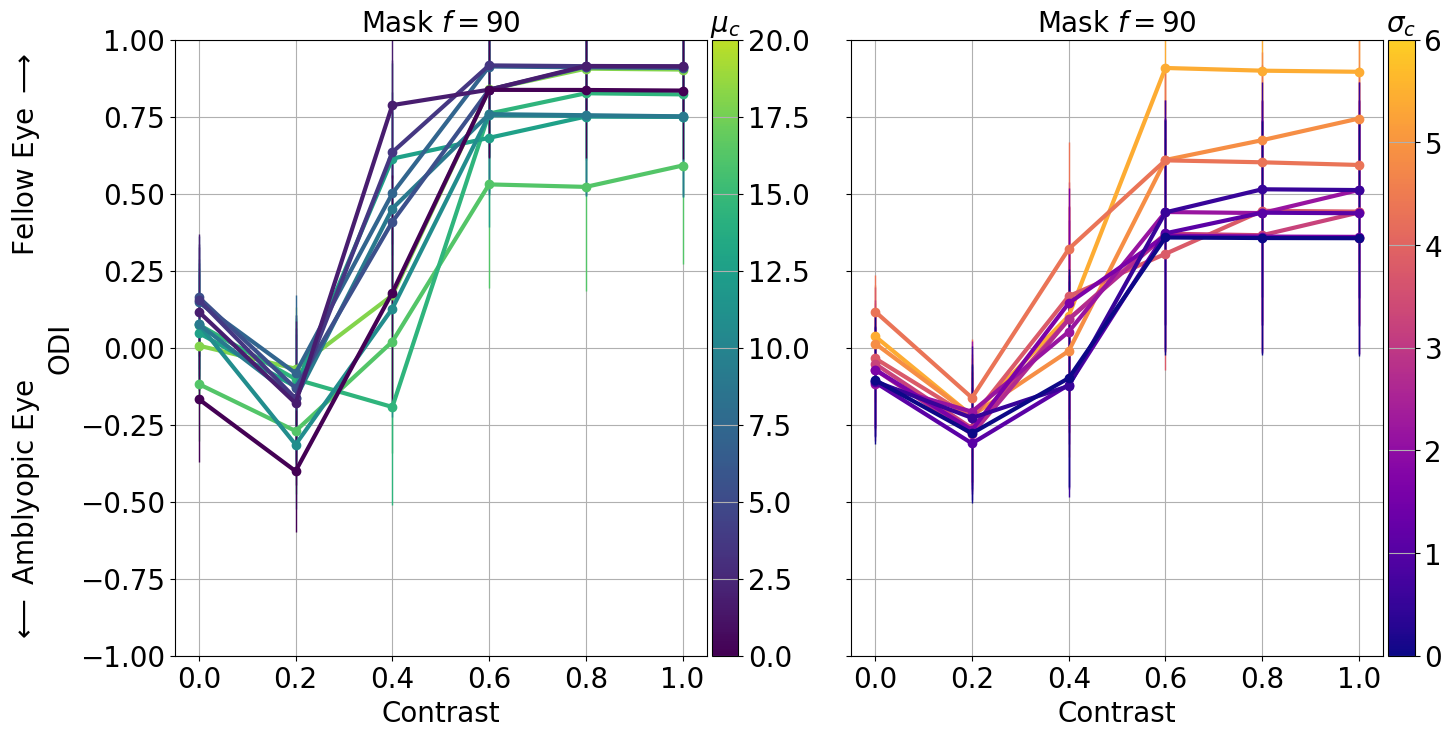

In [8]:
figure(figsize=(16,8))
subplot(1,2,1)
for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n] and 
        _.sigma_c==sigma_c_mat[n] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        ODI=ODI_results[params.sfname]
        contrast=params.contrast
        μ,σ=μσ(ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()

                
    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=viridis(v[n]))


xlabel('Contrast')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
title('No Mask')
ylim([-1,1])
yticks=gca().get_yticks()

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=viridis,
                                norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\mu_c$')



subplot(1,2,2)

for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n+Nsim] and 
        _.sigma_c==sigma_c_mat[n+Nsim] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        ODI=ODI_results[params.sfname]
        contrast=params.contrast
        μ,σ=μσ(ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()

    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=plasma(v[n]))


xlabel('Contrast')
title('No Mask')
ylim([-1,1])
gca().set_yticks(yticks)
gca().set_yticklabels([])

    
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plasma,
                                norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\sigma_c$')






for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    
    figure(figsize=(16,8))
    subplot(1,2,1)

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n] and 
            _.sigma_c==sigma_c_mat[n] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            ODI=ODI_results[params.sfname]
            contrast=params.contrast
            μ,σ=μσ(ODI[-1])

            s+=contrast,μ,σ

        contrast,μ,σ=s.arrays()


        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=viridis(v[n]))


    xlabel('Contrast')
    ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
    title(f'Mask $f={f}$')
    ylim([-1,1])

    yticks=gca().get_yticks()
    
    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=viridis,
                                    norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    title(r'$\mu_c$')

    
    subplot(1,2,2)

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n+Nsim] and 
            _.sigma_c==sigma_c_mat[n+Nsim] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            ODI=ODI_results[params.sfname]
            contrast=params.contrast
            μ,σ=μσ(ODI[-1])

            s+=contrast,μ,σ

        contrast,μ,σ=s.arrays()

        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=plasma(v[n]))


    xlabel('Contrast')
    title(f'Mask $f={f}$')
    ylim([-1,1])
    gca().set_yticks(yticks)
    gca().set_yticklabels([])
    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plasma,norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    title(r'$\sigma_c$')
    